In [ ]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 tensorflow-io matplotlib


In [ ]:
!pip install tensorflow_io==0.25.0

In [ ]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.6
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [ ]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [ ]:
CAPUCHIN_FILE = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC114131-0.wav')
NOT_CAPUCHIN_FILE = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav')


In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC114131-0.wav'

In [ ]:
NOT_CAPUCHIN_FILE

'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips/Crickets-chirping-0.wav'

In [ ]:
CAPUCHIN_FILE

'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC114131-0.wav'

In [ ]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [ ]:
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$S\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00S\x07\x00[\x00\x9c\xff\xb2\x00A\x00\x9b\x00\xfb\x00u\x00y\x01u\x00l\x01L\x00\xf7\x00\x1f\x00\xa7\x00;\x00\xba\x00P\x00\x03\x01L\x00]\x01\x91\x00\x96\x01\xfa\x00\x7f\x01,\x01C\x01:\x01\x1d\x01.\x01\xfe\x00\xe8\x00\x0b\x01\x89\x00o\x01@\x00\xca\x01"\x00\xb4\x01:\x00?\x01f\x00\xac\x00\x9a\x00T\x00\xe8\x00\x86\x00\t\x01\xff\x00\xd1\x00B\x01\x99\x002\x01]\x00\xd9\x00\xc3\xff6\x00>\xff\x8e\xffV\xffO\xff\xa6\xff\x8e\xff\xdb\xff\x19\x00,\x00\xa5\x00w\x00\xbd\x00c\x00\x1b\x00\x0f\x006\xff\xb4\xff\xb3\xfee\xff\x9f\xfeC\xff\xbf\xfe]\xff\x02\xff\x85\xff?\xff{\xff/\xffC\xff\xd4\xfe-\xffk\xfeM\xff7\xfeb\xff\\\xfeq\xff\xb4\xfe\x98\xff\xdb\xfe\x81\xff\xa0\xfe\t\xffC\xfe\xa1\xfe\x06\xfe\x7f\xfe\xe5\xfd\x81\xfe\x00\xfe\xae\xfe\x8b\xfe\x02\xff/\xffN\xffc\xffu\xff1\xffd\xff\xde\xfe+\xffw\xfe\x17\xff@\xfe5\xff\x92\xfeH\xffJ\xffJ\xff\xfb\xffF\xffg\x00/\xff

In [ ]:
# Decode wav (tensors by channels)
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [ ]:
wav

<tf.Tensor: shape=(120000, 1), dtype=float32, numpy=
array([[ 0.0027771 ],
       [ 0.00543213],
       [ 0.00473022],
       ...,
       [-0.00341797],
       [-0.00366211],
       [-0.00689697]], dtype=float32)>

In [ ]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=48000>

In [ ]:
len(wav)

120000

In [ ]:
wav = tfio.audio.resample(wav, rate_in=48000, rate_out=16000)

In [ ]:
wav

<tf.Tensor: shape=(40000, 1), dtype=float32, numpy=
array([[-2.1452930e-08],
       [ 2.9903514e-08],
       [ 2.3691292e-08],
       ...,
       [ 1.1810826e-02],
       [ 1.3428938e-02],
       [ 3.8246573e-03]], dtype=float32)>

In [ ]:
len(wav)

40000

In [ ]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

In [ ]:
len(wave)

40000

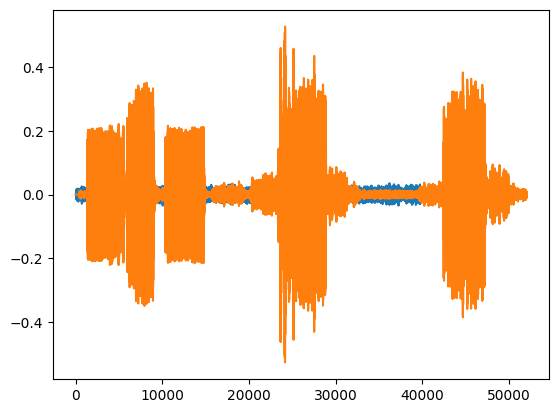

In [ ]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

In [ ]:
POS = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips')
NEG = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips')

In [ ]:
POS

'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips'

In [ ]:
pos = tf.data.Dataset.list_files(POS +'/*.wav')
neg = tf.data.Dataset.list_files(NEG +'/*.wav')

In [ ]:
pos.as_numpy_iterator().next()

b'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC520626-2.wav'

In [ ]:
pos

<ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [ ]:
len(pos),len(neg)

(217, 593)

In [ ]:
tf.ones(len(pos)),tf.zeros(len(neg))

(<tf.Tensor: shape=(217,), dtype=float32, numpy=
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1.,

In [ ]:

positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)    # Concatenate is just a combination of total data positives and negatives

In [ ]:
positives

<ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
positives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC433953-4.wav',
 1.0)

In [ ]:
negatives.as_numpy_iterator().next()

(b'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips/birds-singing-in-forest-sounds-4.wav',
 0.0)

In [ ]:
data = positives.concatenate(negatives)
data

<ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [ ]:
data.shuffle(10000).as_numpy_iterator().next()

(b'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Not_Capuchinbird_Clips/rain-thunder-and-crickets-sound-effect-40.wav',
 0.0)

In [ ]:
lengths = []
for file in os.listdir(os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [ ]:
os.listdir(os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips'))

['XC114132-0.wav',
 'XC114131-1.wav',
 'XC114131-4.wav',
 'XC114132-1.wav',
 'XC114131-0.wav',
 'XC114131-2.wav',
 'XC114132-2.wav',
 'XC114131-3.wav',
 'XC178168-4.wav',
 'XC178168-6.wav',
 'XC119294-0.wav',
 'XC16804-1.wav',
 'XC114132-5.wav',
 'XC178168-1.wav',
 'XC16803-0.wav',
 'XC114132-6.wav',
 'XC16803-2.wav',
 'XC178167-2.wav',
 'XC16804-0.wav',
 'XC178168-5.wav',
 'XC178167-1.wav',
 'XC178168-2.wav',
 'XC178168-3.wav',
 'XC178168-7.wav',
 'XC178168-0.wav',
 'XC114132-3.wav',
 'XC178167-0.wav',
 'XC114132-4.wav',
 'XC168899-0.wav',
 'XC16803-1.wav',
 'XC201990-0.wav',
 'XC178167-3.wav',
 'XC216010-5.wav',
 'XC216010-4.wav',
 'XC216010-3.wav',
 'XC216012-16.wav',
 'XC216012-12.wav',
 'XC216010-2.wav',
 'XC201990-1.wav',
 'XC216010-7.wav',
 'XC216010-0.wav',
 'XC216010-1.wav',
 'XC216012-10.wav',
 'XC216012-15.wav',
 'XC201990-4.wav',
 'XC216012-17.wav',
 'XC201990-2.wav',
 'XC216012-14.wav',
 'XC201990-5.wav',
 'XC201990-3.wav',
 'XC216012-11.wav',
 'XC216012-1.wav',
 'XC216012

In [ ]:
lengths

[64000,
 48000,
 56000,
 64000,
 40000,
 56000,
 64000,
 48000,
 64000,
 48000,
 64000,
 64000,
 48000,
 48000,
 56000,
 56000,
 64000,
 56000,
 64000,
 64000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 64000,
 40000,
 64000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 64000,
 40000,
 56000,
 64000,
 48000,
 40000,
 56000,
 64000,
 48000,
 48000,
 32000,
 48000,
 48000,
 40000,
 64000,
 48000,
 40000,
 64000,
 56000,
 64000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 72000,
 56000,
 56000,
 40000,
 40000,
 48000,
 64000,
 48000,
 40000,
 56000,
 56000,
 56000,
 64000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 48000,
 48000,
 56000,
 64000,
 48000,
 56000,
 64000,
 64000,
 40000,
 56000,
 56000,
 48000,
 48000,
 48000,
 56000,
 64000,
 32000,
 40000,
 56000,
 64000,
 56000,
 48000,
 48000,
 48000,
 64000,
 64000,
 48000,
 64000,
 48000,
 48000,
 56000,
 56000,


In [ ]:
54156/16000

3.38475

In [ ]:
#  3.3 seconds that mostly each videos are about post looking at the mean


In [ ]:
80000/16000

5.0

In [ ]:
  tf.math.reduce_mean(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)


<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [ ]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

In [ ]:
 wav = load_wav_16k_mono(CAPUCHIN_FILE)
 wav = wav[:48000]
 zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
 wav = tf.concat([zero_padding, wav],0)

In [ ]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , ..., 0.01181083, 0.01342894,
       0.00382466], dtype=float32)>

In [ ]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
spectrogram = tf.abs(spectrogram)
spectrogram = tf.expand_dims(spectrogram, axis=2)

In [ ]:
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       [[0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00],
        ...,
        [0.0000000e+00],
        [0.0000000e+00],
        [0.0000000e+00]],

       ...,

       [[6.1496712e-02],
        [6.2195774e-02],
        [6.0981087e-02],
        ...,
        [1.1465910e-05],
        [1.3461963e-05],
        [1.1995435e-05]],

       [[6.0565237e-02],
        [6.5492265e-02],
        [6.8888620e-02],
        ...,
        [6.9882640e-06],
        [3.5987678e-06],
        [1.0170043e-06]],

       [[4.3328911e-02],
        [5.7293948e-02],
        [6.8963550e-02],
        ...,
        [9.7474303

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()


In [ ]:
# filepath, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()


In [ ]:
filepath,label

(b'/content/drive/MyDrive/DeepAudioClassification/Data/Parsed_Capuchinbird_Clips/XC456236-3.wav',
 1.0)

In [ ]:
spectrogram, label = preprocess(filepath, label)


In [ ]:

spectrogram, label

(<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
 array([[[1.67450190e-01],
         [1.05311818e-01],
         [1.60042390e-01],
         ...,
         [2.53243616e-05],
         [4.22767807e-05],
         [2.59205699e-05]],
 
        [[1.34311303e-01],
         [1.60739601e-01],
         [1.83623284e-01],
         ...,
         [9.43745472e-05],
         [3.49049515e-05],
         [2.01910734e-05]],
 
        [[1.24302968e-01],
         [1.49126858e-01],
         [1.72525719e-01],
         ...,
         [1.09818204e-04],
         [5.35901636e-05],
         [2.81631947e-05]],
 
        ...,
 
        [[1.19404927e-01],
         [2.05285743e-01],
         [2.52200365e-01],
         ...,
         [5.83322762e-05],
         [6.48802670e-05],
         [5.66393137e-05]],
 
        [[7.91419297e-03],
         [2.01002330e-01],
         [2.86056906e-01],
         ...,
         [7.55857400e-05],
         [6.37820121e-05],
         [1.35526061e-05]],
 
        [[1.33094594e-01],
      

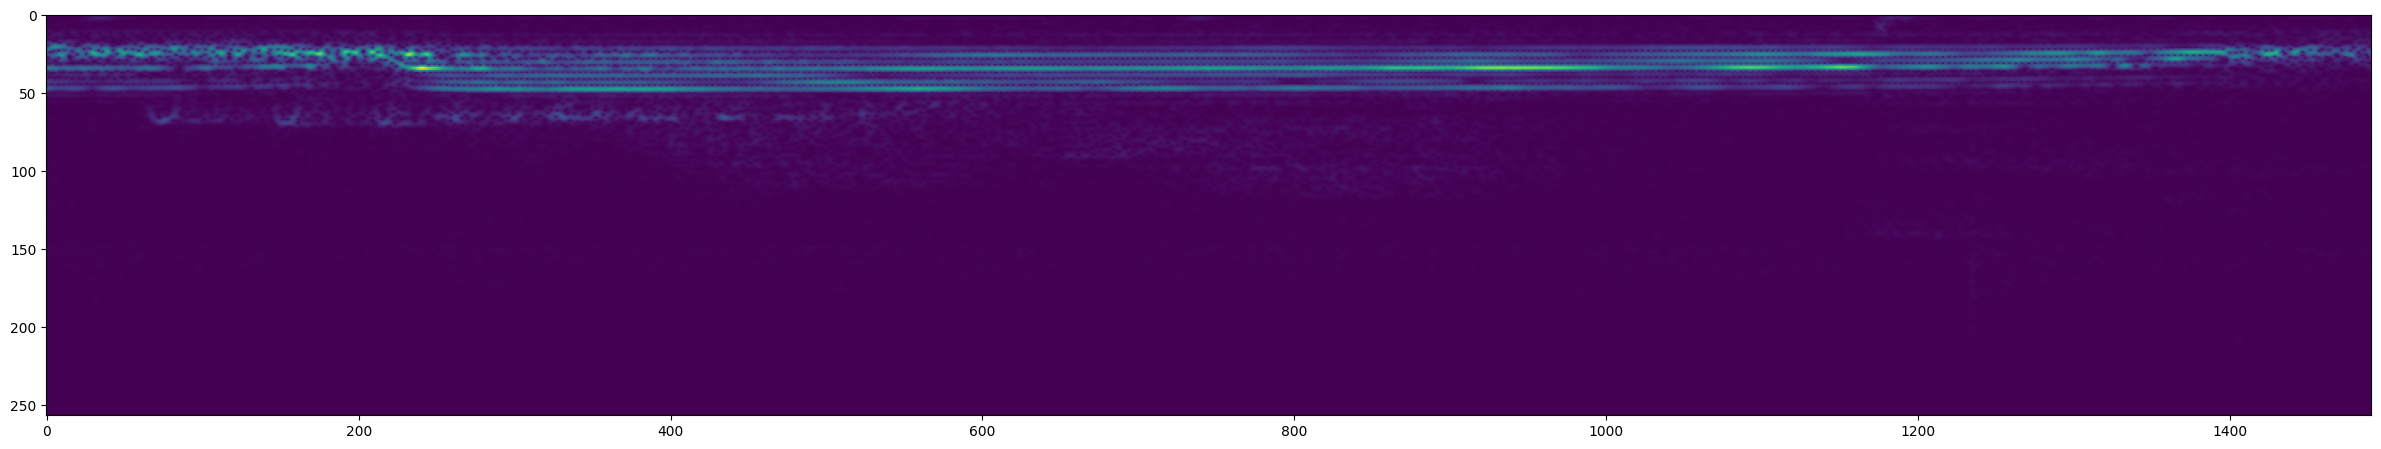

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [ ]:
len(data)

51

In [ ]:
len(data)*.7

35.699999999999996

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

In [ ]:
samples, labels = train.as_numpy_iterator().next()


In [ ]:

samples.shape


(16, 1491, 257, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(20, activation='relu'))             # here i made the changes and it worked Wow 20 from 128
model.add(Dense(1, activation='sigmoid'))

ResourceExhaustedError: ignored

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.Precision(name='precision')])


In [ ]:
model.summary()

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)


In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()


In [ ]:
yhat = model.predict(X_test)


In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]


In [ ]:
yhat

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Forest Recordings', '/content/drive/MyDrive/DeepAudioClassification/Data/Forest Recordings/recording_01.mp3')


In [ ]:
wav = load_mp3_16k_mono(mp3)


In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)


In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()


In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

In [ ]:
from itertools import groupby


In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

In [ ]:
results = {}
for file in os.listdir(os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data', '/content/drive/MyDrive/DeepAudioClassification/Data/Forest Recordings')):
    FILEPATH = os.path.join('/content/drive/MyDrive/DeepAudioClassification/Data','/content/drive/MyDrive/DeepAudioClassification/Data/Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    yhat = model.predict(audio_slices)

    results[file] = yhat

In [ ]:
results


In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

In [ ]:
import csv


In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])